# Creating Sim Brains for CVAE Training - Test Code

In [1]:
pwd

'/mmfs1/data/bergerar/BC-sim'

## Imports

In [5]:
import ants
import numpy as np
import pandas as pd
import os

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Create Spheres

In [7]:
import numpy as np
def sphere(shape, radius, position):
    """Generate an n-dimensional spherical mask."""
    # assume shape and position have the same length and contain ints
    # the units are pixels / voxels (px for short)
    # radius is a int or float in px
    assert len(position) == len(shape)
    n = len(shape)
    semisizes = (radius,) * len(shape)

    # genereate the grid for the support points
    # centered at the position indicated by position
    grid = [slice(-x0, dim - x0) for x0, dim in zip(position, shape)]
    position = np.ogrid[grid]
    # calculate the distance of all points from `position` center
    # scaled by the radius
    arr = np.zeros(shape, dtype=float)
    for x_i, semisize in zip(position, semisizes):
        # this can be generalized for exponent != 2
        # in which case `(x_i / semisize)`
        # would become `np.abs(x_i / semisize)`
        arr += (x_i / semisize) ** 2

    # the inner part of the sphere will have distance below or equal to 1
    return arr <= 1.0

## Get Brain and Resize

In [8]:
brain_size = (64,64,64)

In [11]:
s = '0010001'
temp = ants.image_read('../../BC-sim/sub-0010001_Extracted_Brain-Copy1.nii.gz')
temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
temp = temp.iMath_normalize()

In [12]:
temp.max()

1.0

In [13]:
# make sure image was sized correctly
brain_size = temp.shape
print(brain_size)

(64, 64, 64)


## Unaltered Brain

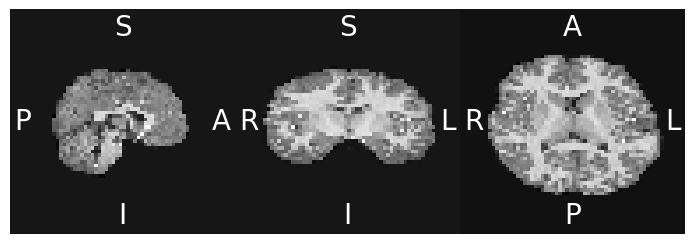

In [15]:
temp.plot_ortho(flat=True,xyz_lines=False)

## Coordinates of target alteration

In [10]:
coords = (32,32,32)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Plot Coordinates

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



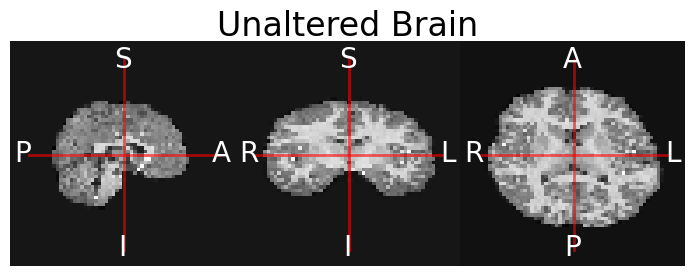

In [40]:
temp.plot_ortho(flat=True,xyz=coords, title = 'Unaltered Brain')

## Add Spheres

In [16]:
sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0)
sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0)
#.plot_ortho(flat=True,xyz=[32,32,32])

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



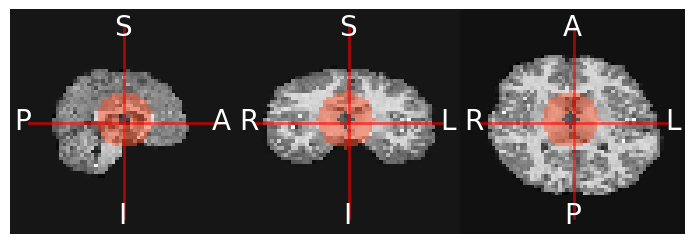

In [17]:
temp.plot_ortho(sphere_small*3+sphere_big*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)

In [18]:
#mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big,type_of_transform = 'SyN' )
mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big,type_of_transform = 'SyNOnly' )

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



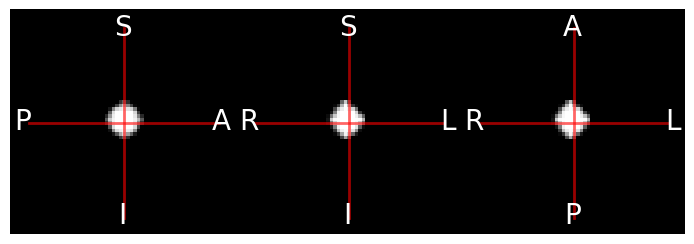

In [19]:
mytx['warpedmovout'].plot_ortho(flat=True,xyz=coords)

## Brain Alteration

/tmp/tmpkhg_j2df1Warp.nii.gz


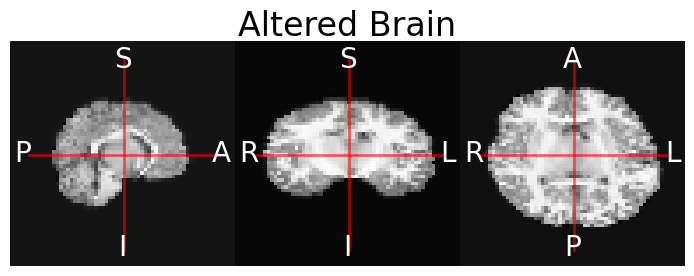

In [39]:
warpedBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
print(mytx['fwdtransforms'][0])
warpedBrain.plot_ortho(flat=True,xyz=coords, title='Altered Brain')

## Save Altered Brain

In [36]:
ofn = f'../BC-sim/Extracted_Brains/{s}_Extracted_Brain.nii.gz'
warpedBrain.to_file(ofn) #save it

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



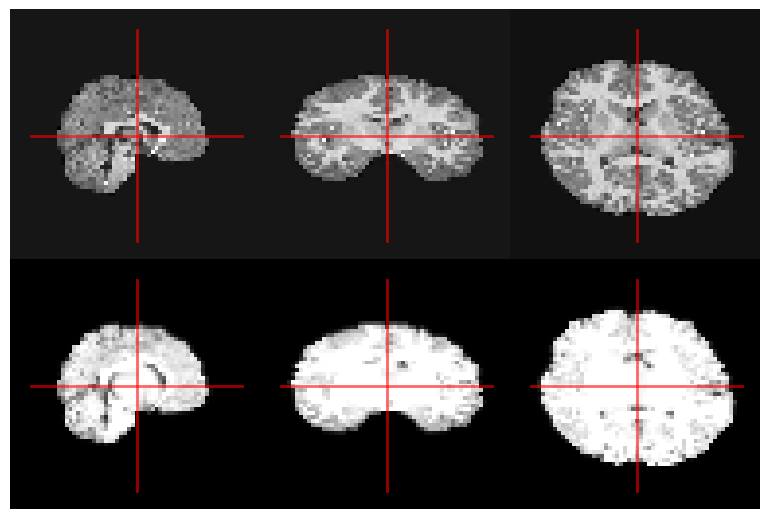

In [21]:
temp.plot_ortho_double(warpedBrain,xyz=coords)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



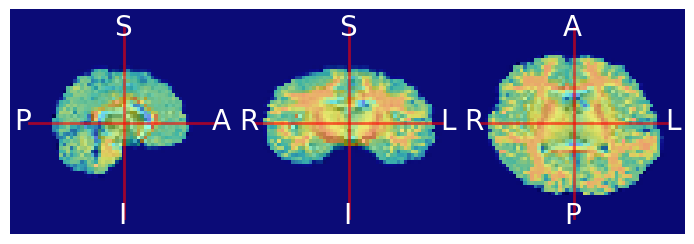

In [40]:
temp.plot_ortho(warpedBrain,flat=True,overlay_alpha=.5,xyz=coords)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



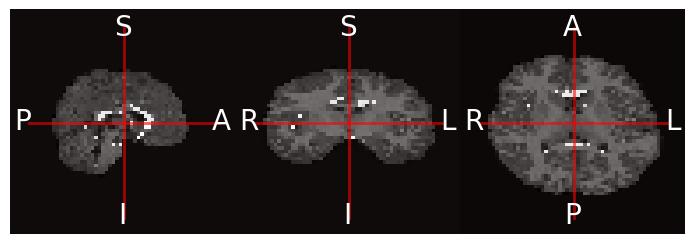

In [41]:
temp.plot_ortho((temp-warpedBrain)>np.sort((temp-warpedBrain).numpy().flatten())[-250],flat=True,overlay_alpha=.5,overlay_cmap='hot',xyz=coords)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



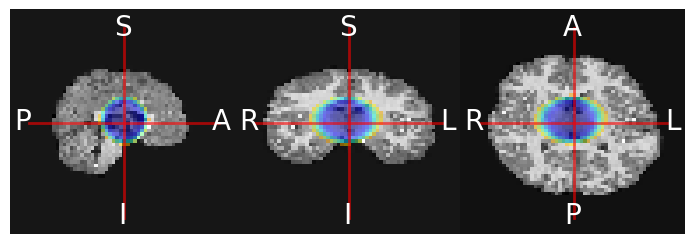

In [42]:
J = ants.create_jacobian_determinant_image(domain_image=temp,tx=mytx['fwdtransforms'][0])
J = J-1
J[abs(J.numpy())<.25]=0
temp.plot_ortho(J,flat=True,overlay_alpha=.5,xyz=coords)

In [2]:
def do_selective_tx(temp,coords = (32,32,50),sz1=10,sz2=2,do_plot=True):

    sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=sz1, position=coords)*1.0)
    sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=sz2, position=coords)*1.0)

    if do_plot==True:
        temp.plot_ortho(sphere_small*3+sphere_big*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5,title='Deformation Targets')

    mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big+sphere_small,type_of_transform = 'SyNOnly' ) # learns a vector field from small to big sphere
    #warpedBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0],interpolator='bSpline') # applies the transformation
    warpedBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
    #warpedBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0],interpolator='nearestNeighbor')
    #print(mytx['fwdtransforms'][0])
    #warpedBrain.plot_ortho(flat=True,xyz=coords)

    #mytx['warpedmovout'].plot_ortho(flat=True,xyz=coords)
    if do_plot==True:
        temp.plot_ortho_double(warpedBrain,xyz=coords,title='Before and After',title_dy=.22)
        (warpedBrain-temp).plot_ortho(flat=True,cmap='bwr',xyz=coords,title='Difference Map')
        
    #temp.plot_ortho((temp-warpedBrain)>np.sort((temp-warpedBrain).numpy().flatten())[-250],flat=True,overlay_alpha=.5,overlay_cmap='hot',xyz=coords)
    #temp.plot_ortho(warpedBrain-temp,flat=True,overlay_alpha=.5,overlay_cmap='bwr',xyz=coords)
    
    J = ants.create_jacobian_determinant_image(domain_image=warpedBrain,tx=mytx['fwdtransforms'][0])
    J = J-1
    #J[abs(J.numpy())<.25]=0
    if do_plot==True:
        warpedBrain.plot_ortho(J,flat=True,overlay_alpha=.5,xyz=coords,title='Jacobian Map')
    
    return warpedBrain

## Warp Brain Function

In [ ]:
# Returns warpedBrain and saves to Warped Brains folder

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



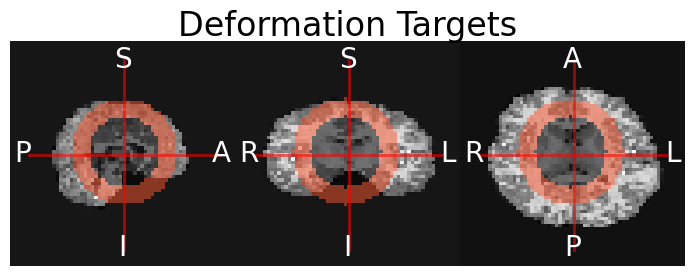

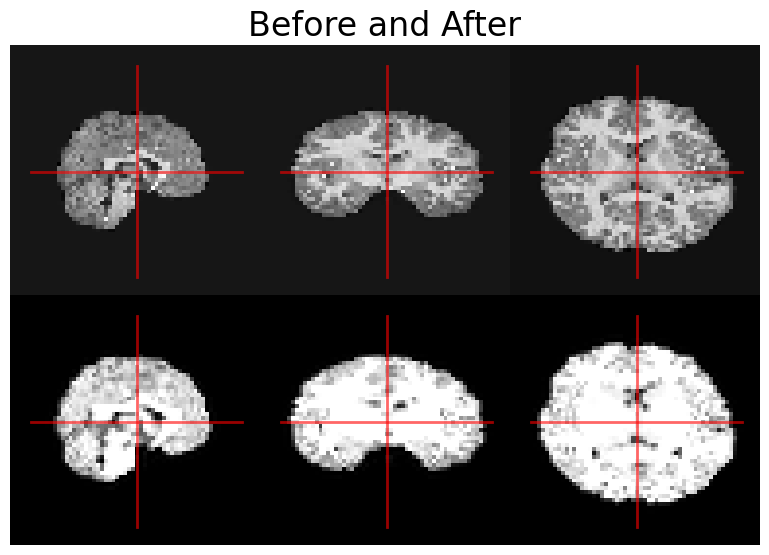

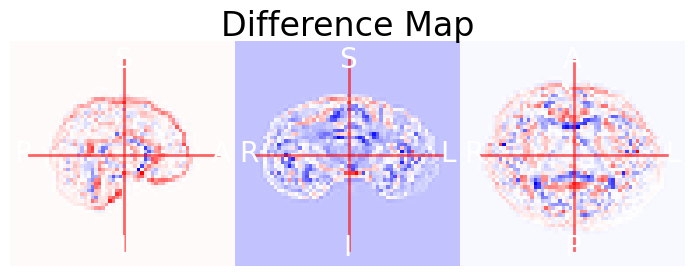

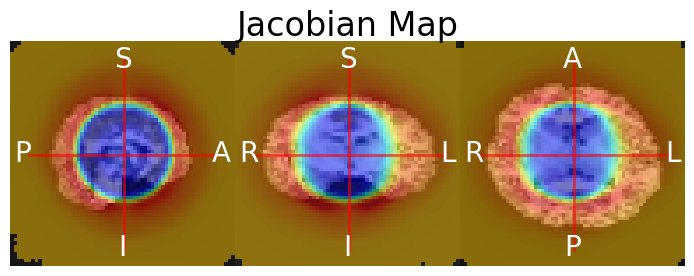

NameError: name 'warpedBrain' is not defined

In [15]:
do_selective_tx(temp,coords = (32,32,32),sz1=10,sz2=15)
ofn = f'../BC-sim/Warped_Brains/{s}_Warped_Brain.nii.gz'
warpedBrain.to_file(ofn) #save it

## Warp Brain Loop SIM 16p11.2 duplication

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



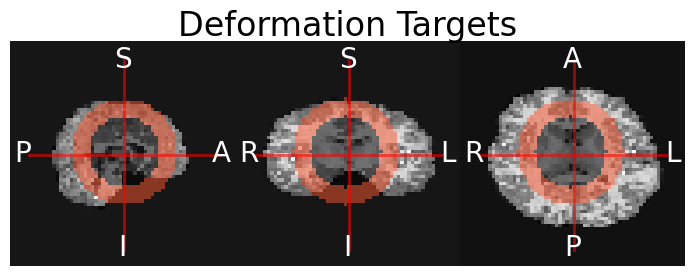

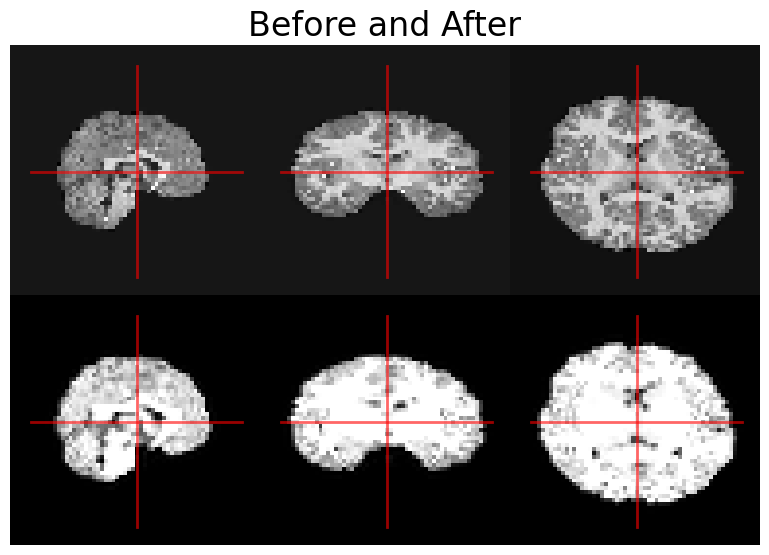

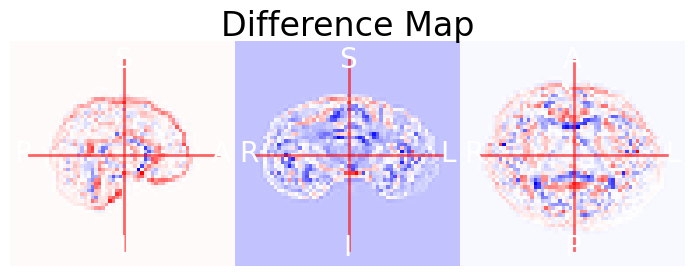

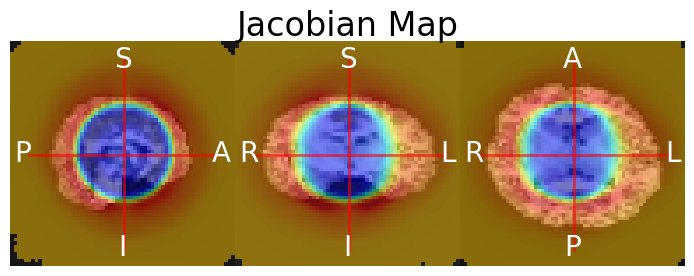

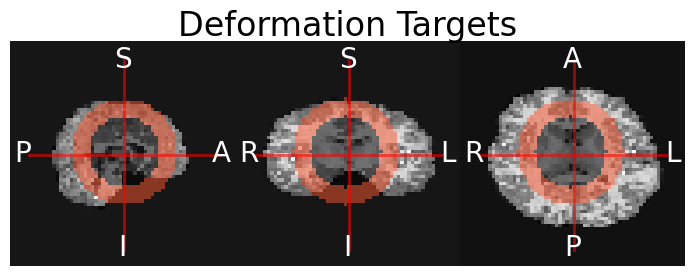

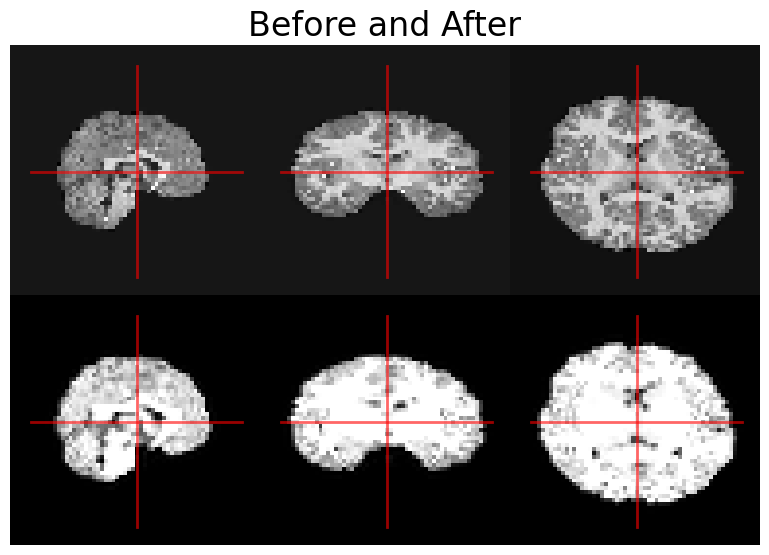

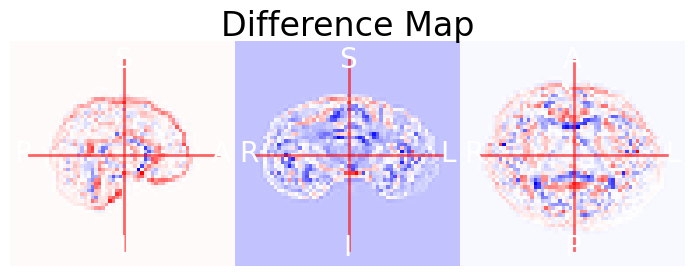

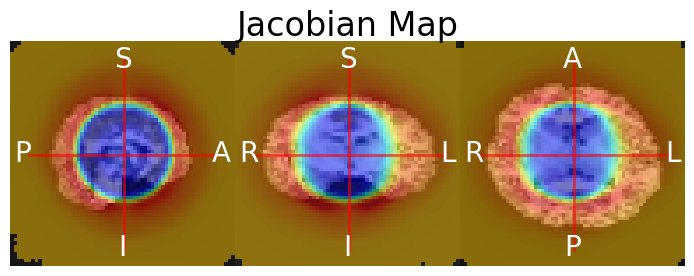

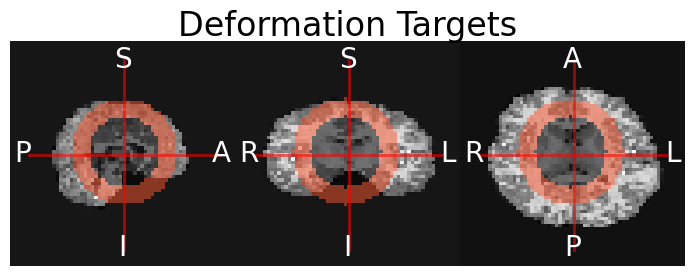

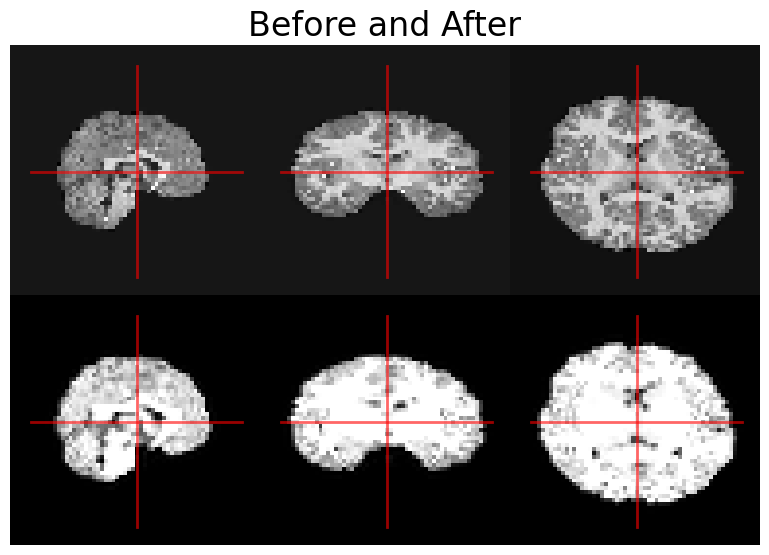

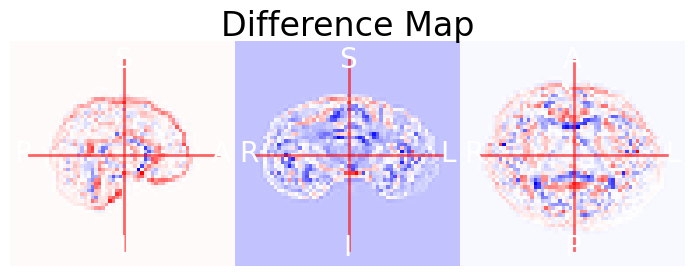

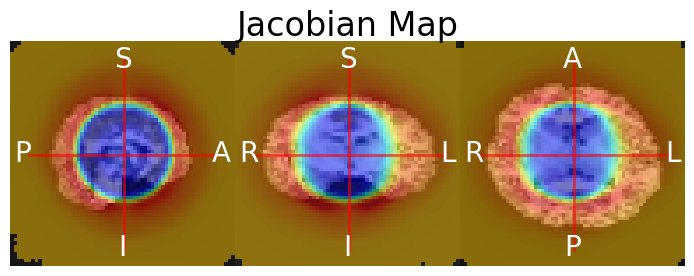

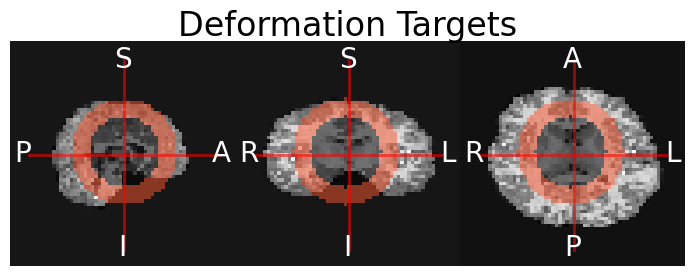

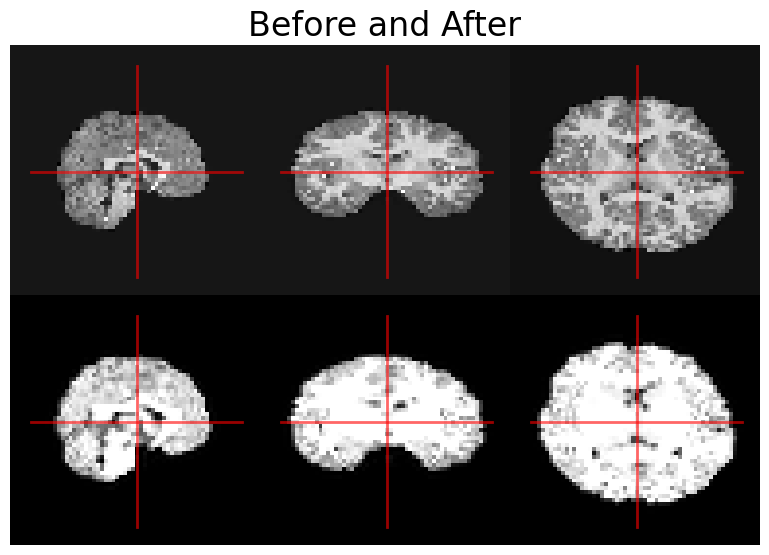

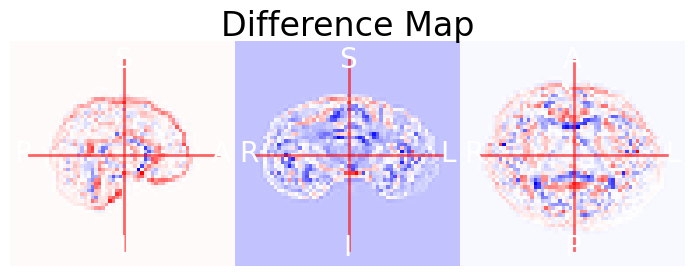

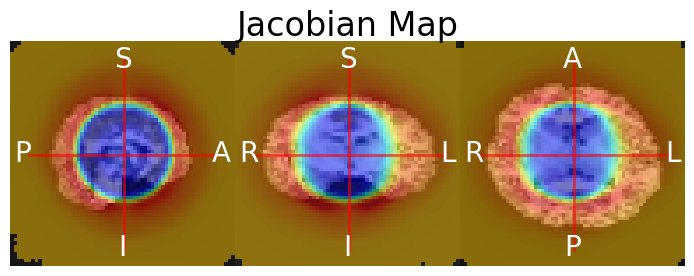

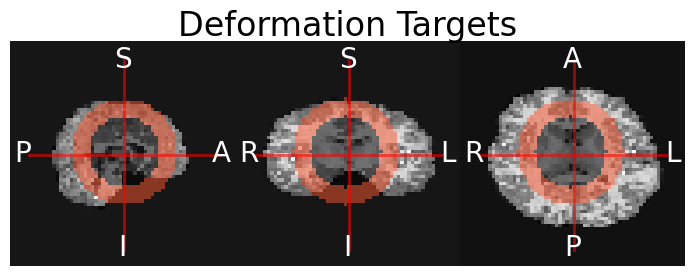

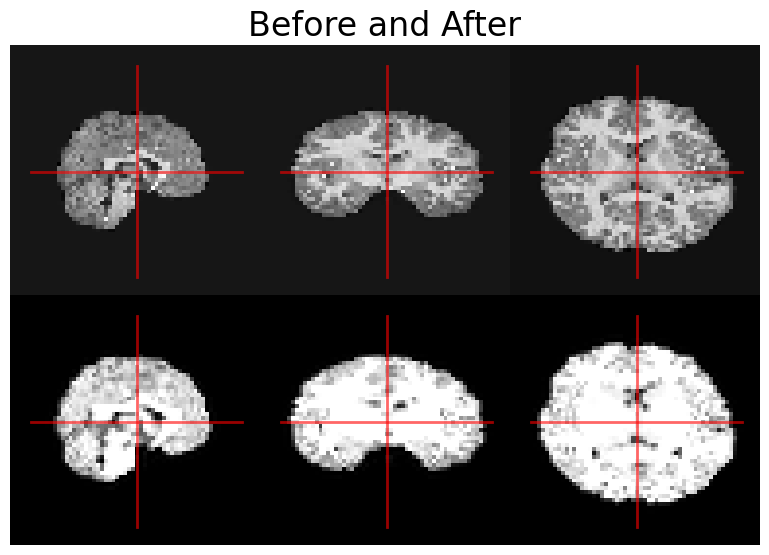

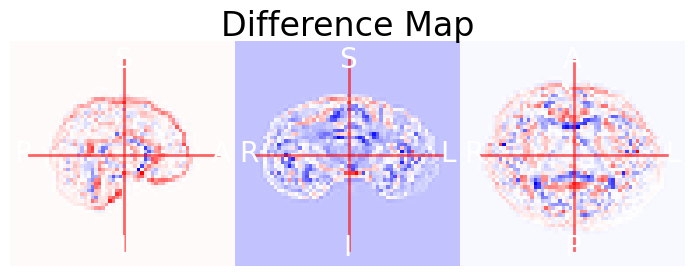

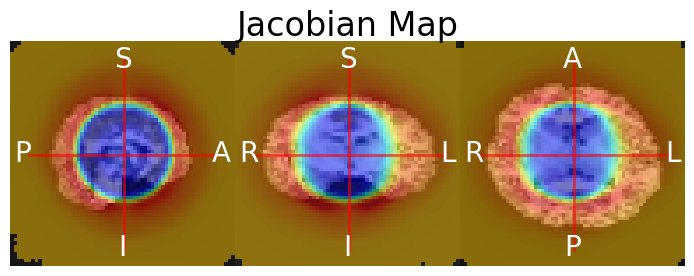

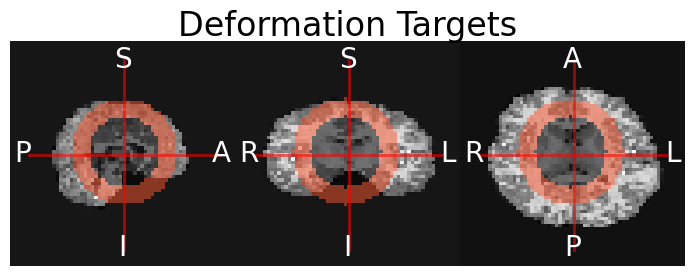

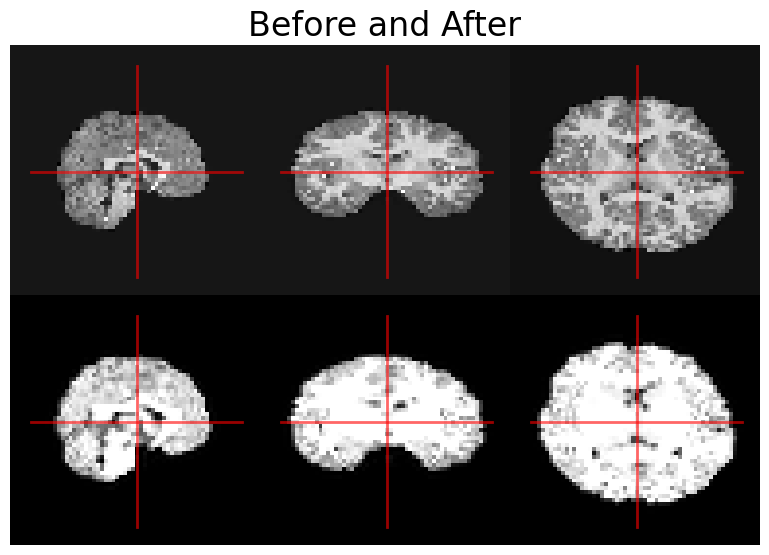

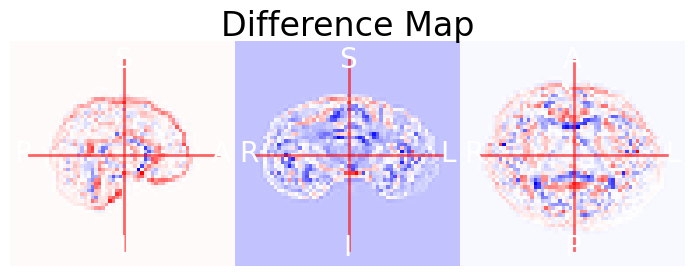

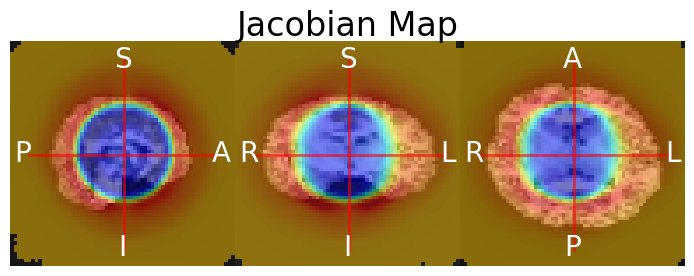

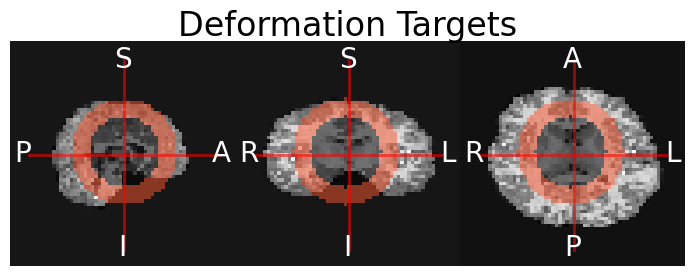

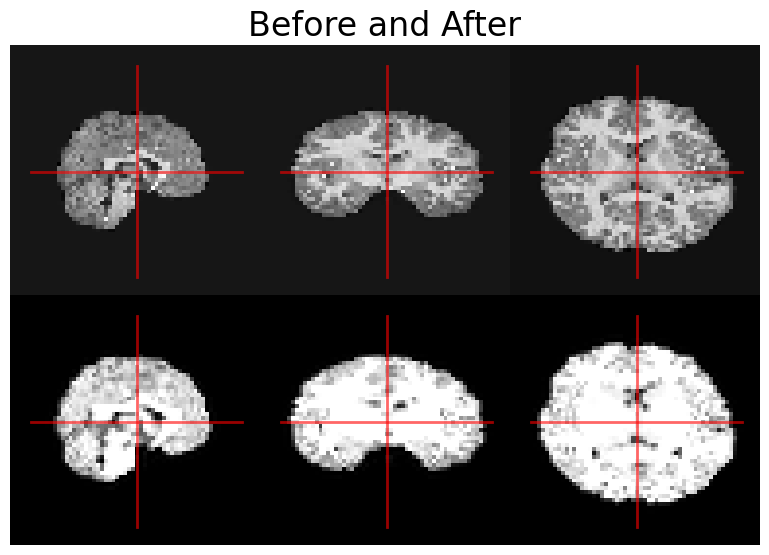

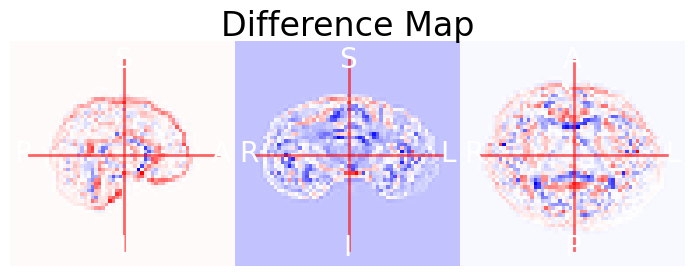

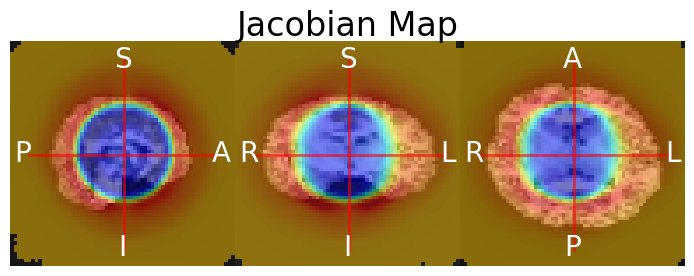

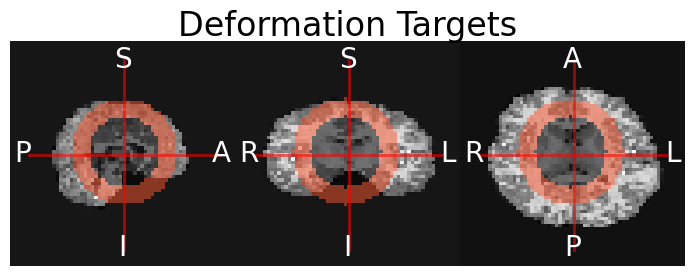

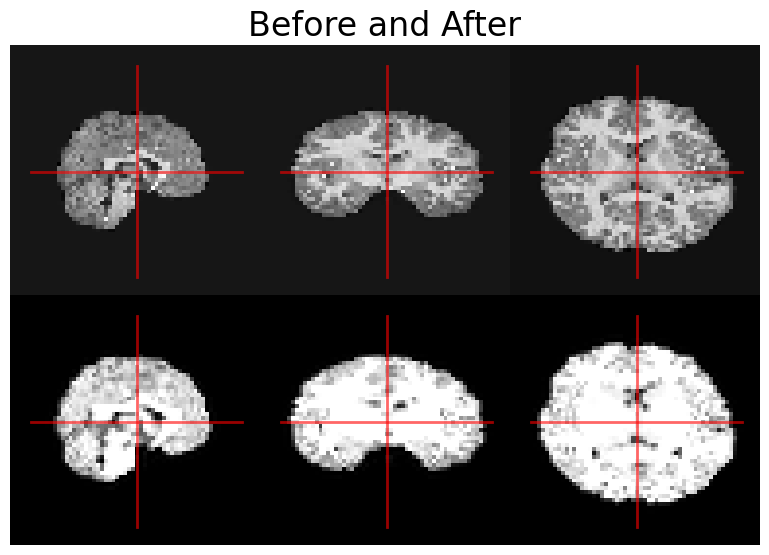

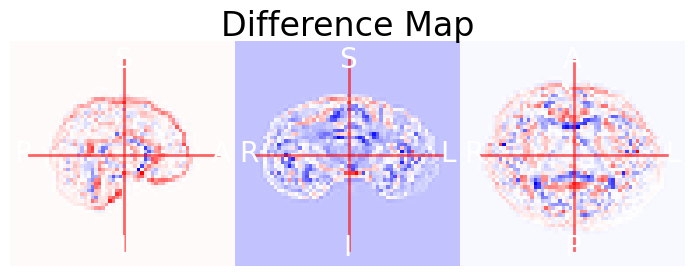

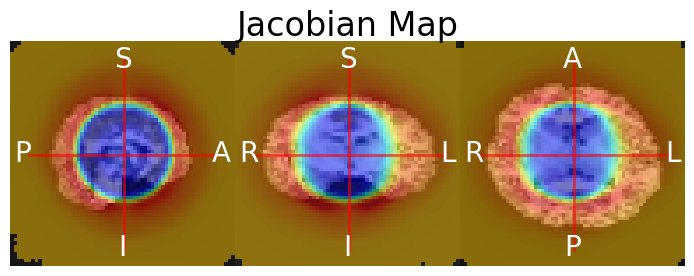

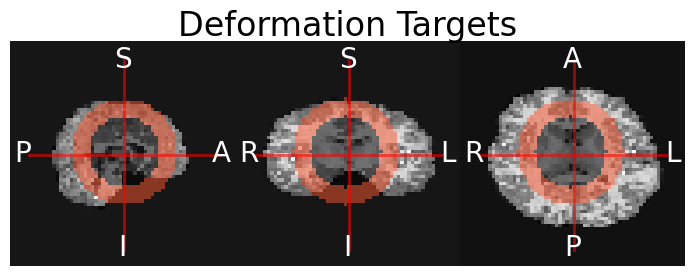

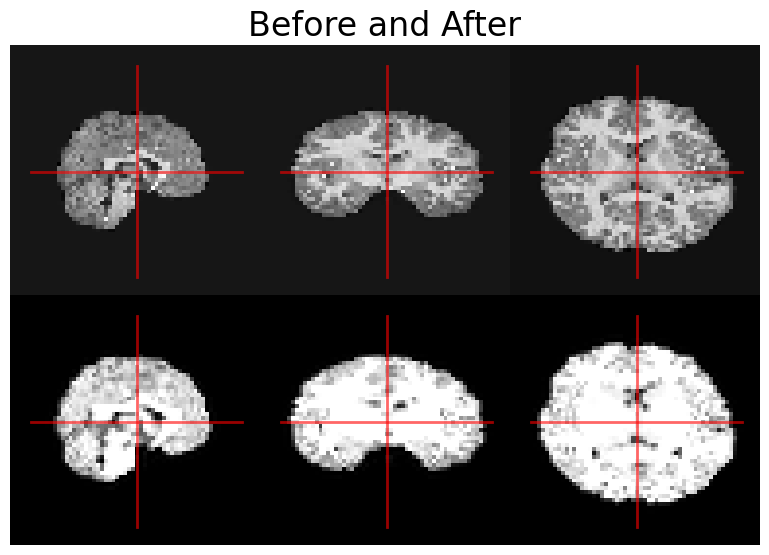

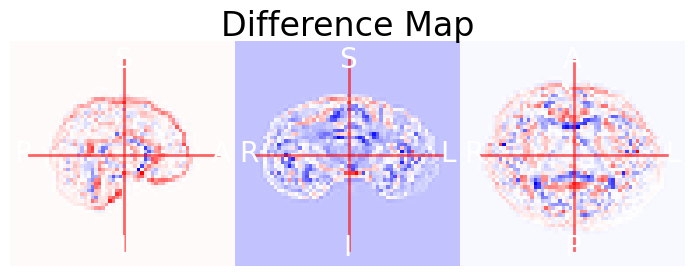

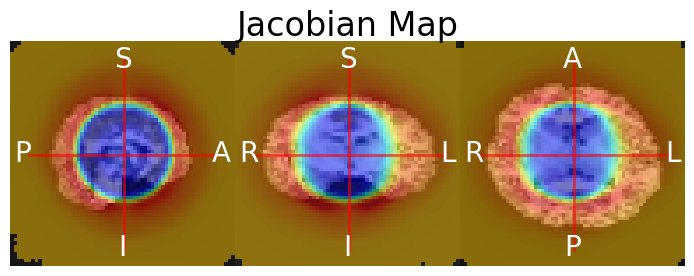

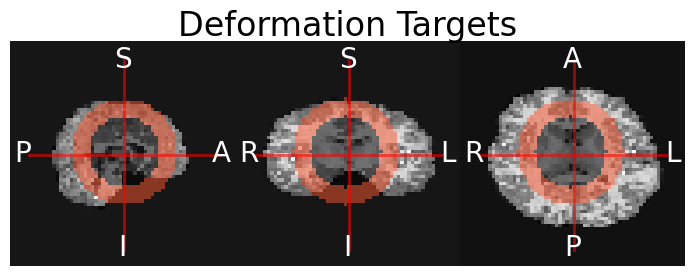

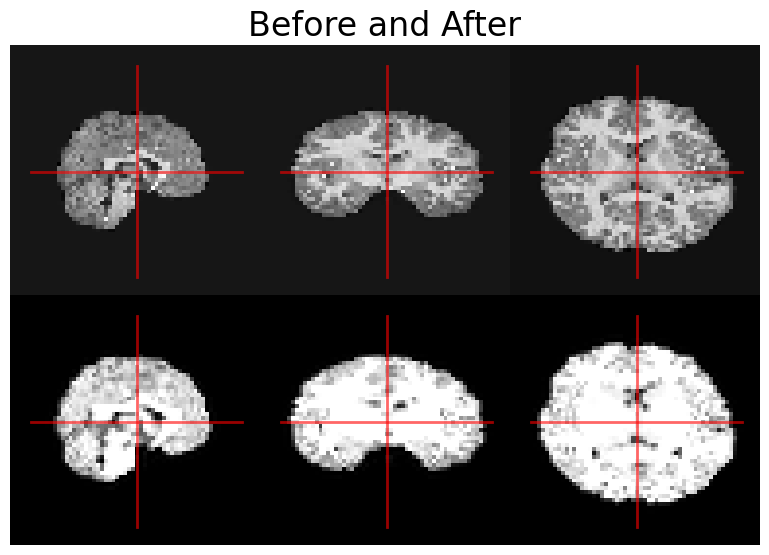

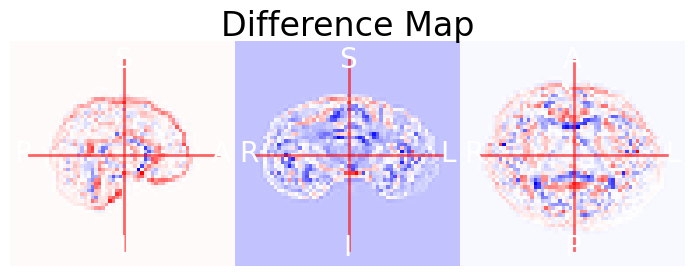

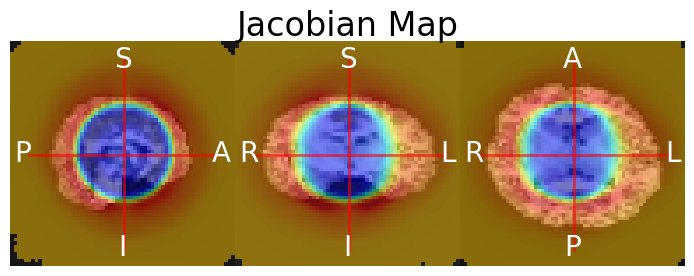

In [49]:
lst = ['sub-0010001',
 'sub-0010002',
 'sub-0010003',
 'sub-0010004',
 'sub-0010005',
 'sub-0010006',
 'sub-0010007',
 'sub-0010008',
 'sub-0010009',
 'sub-0010010']

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



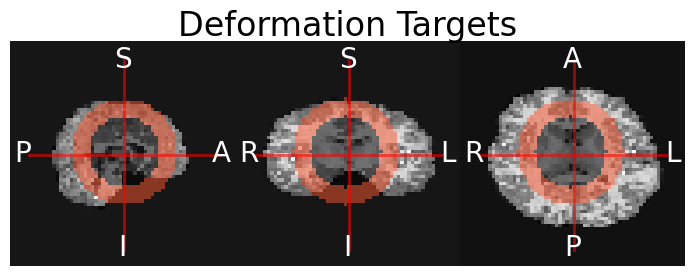

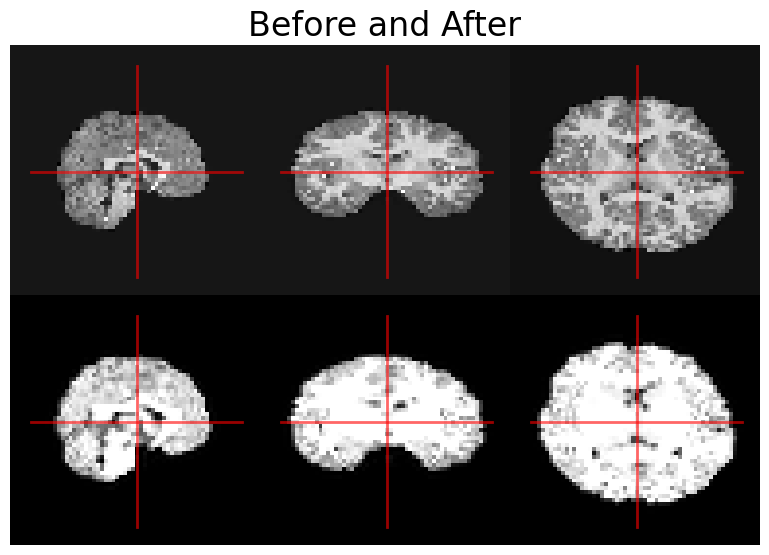

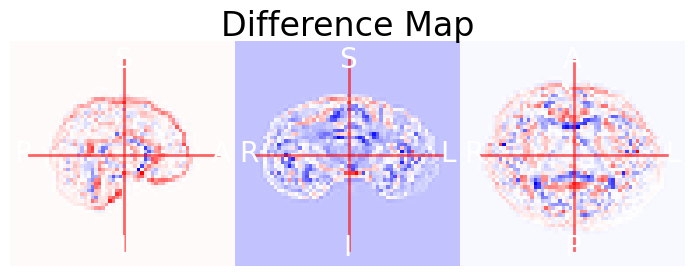

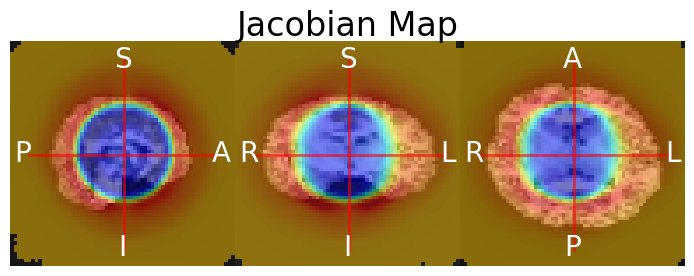

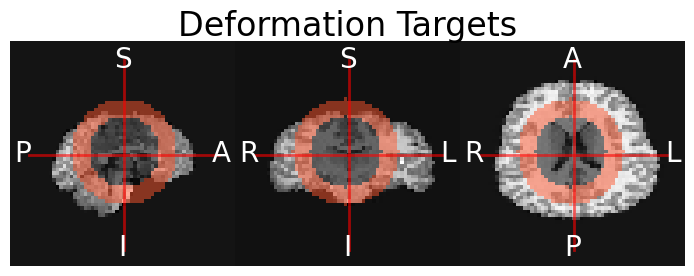

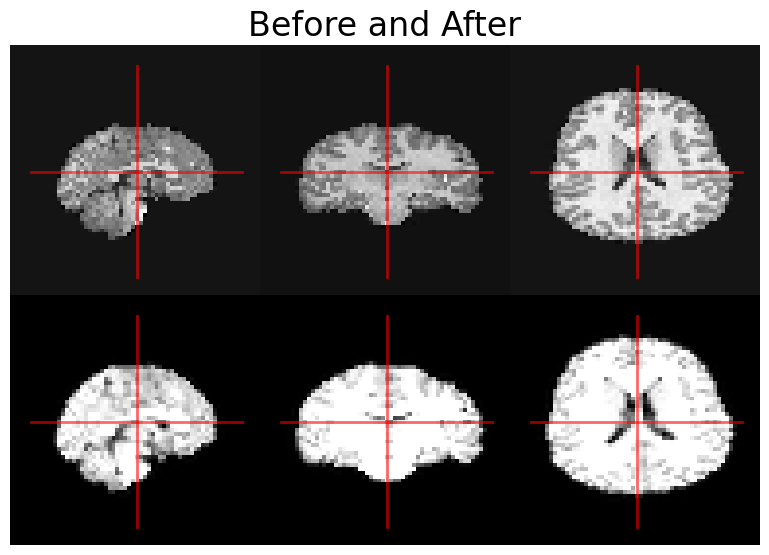

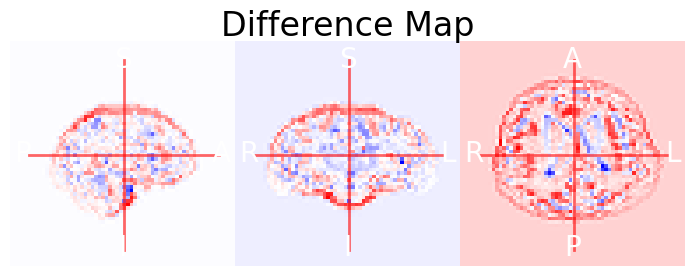

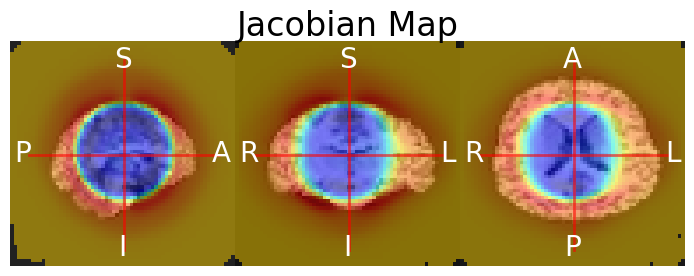

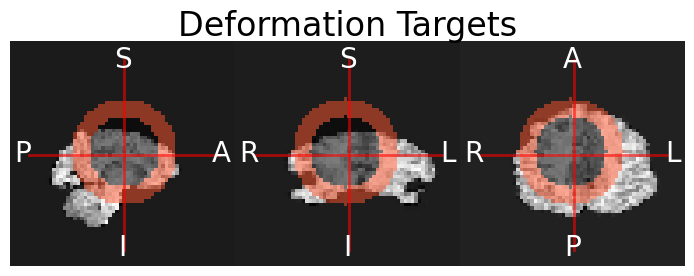

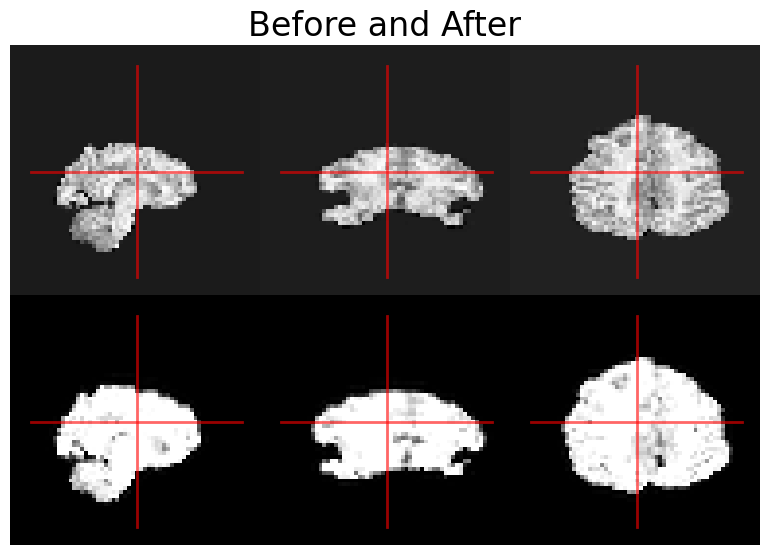

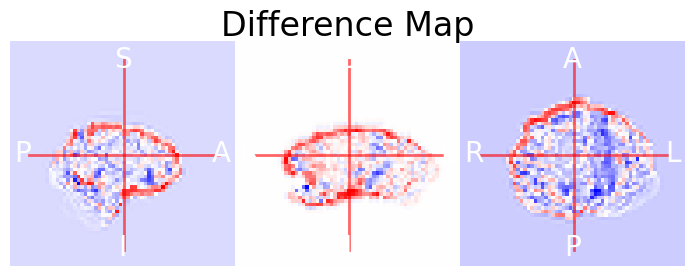

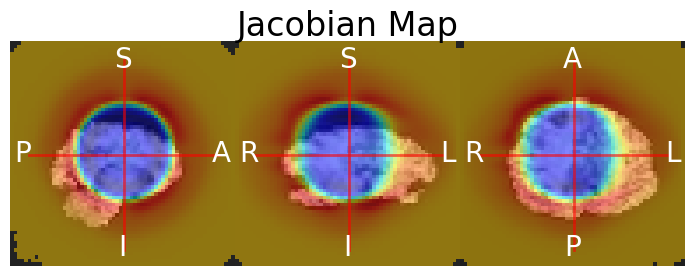

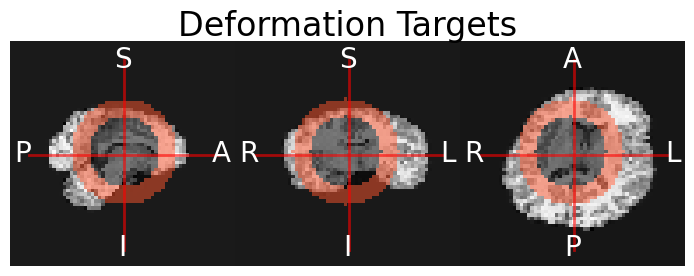

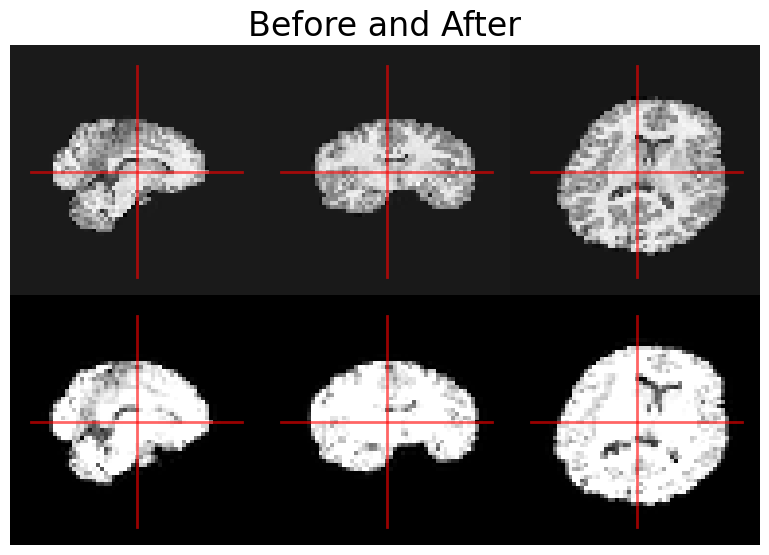

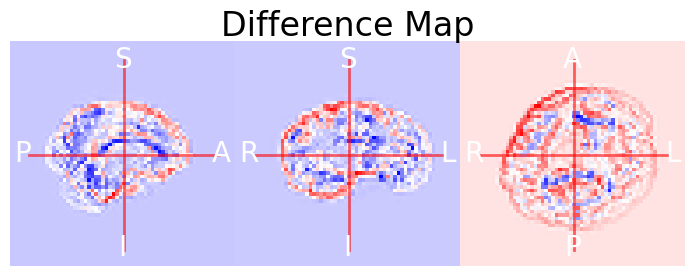

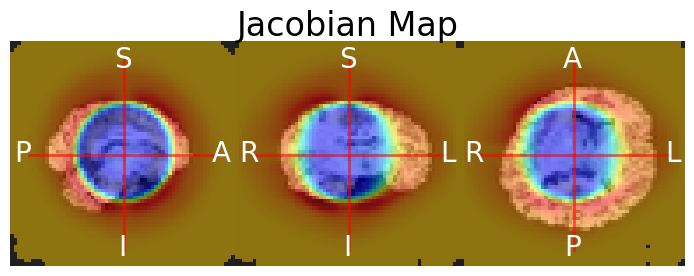

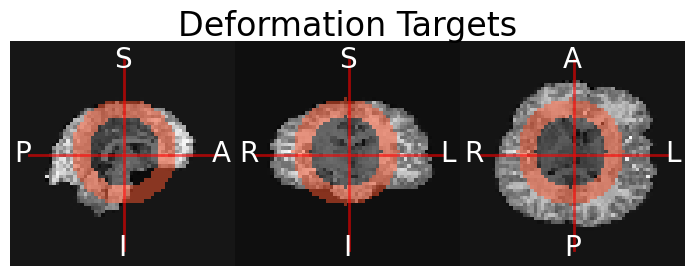

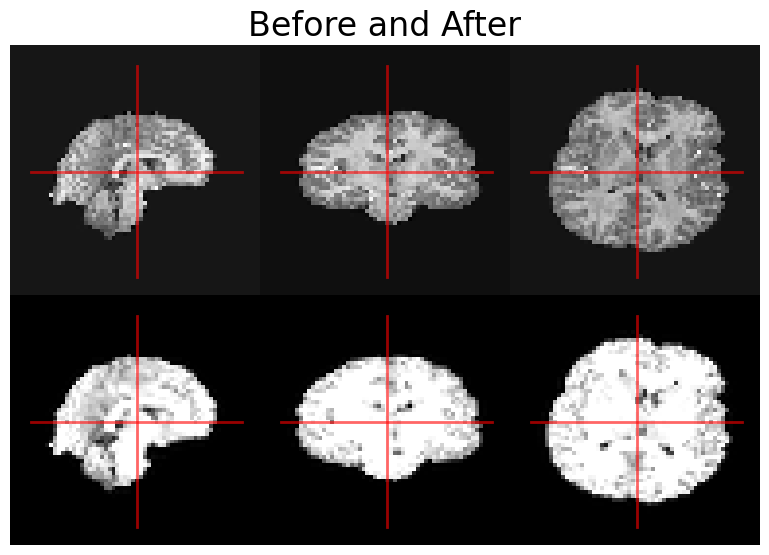

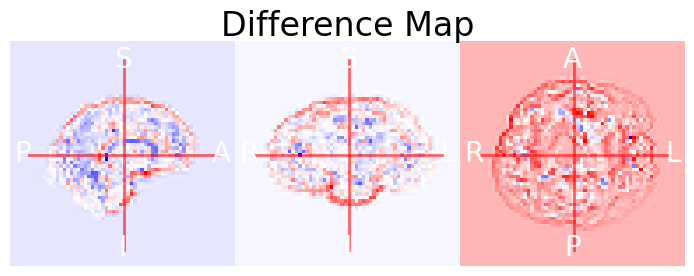

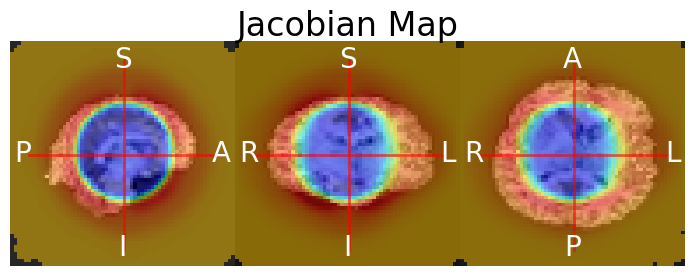

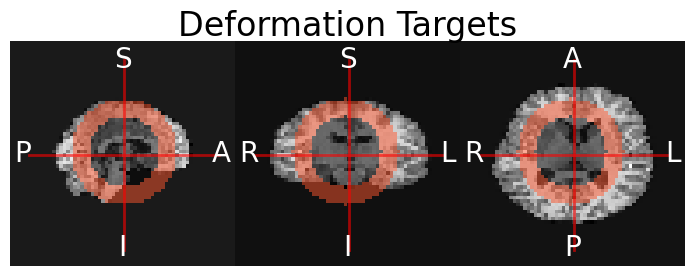

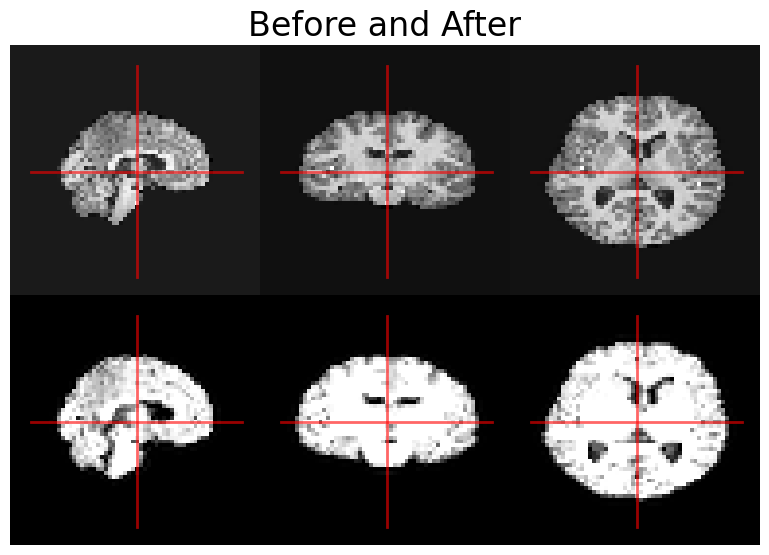

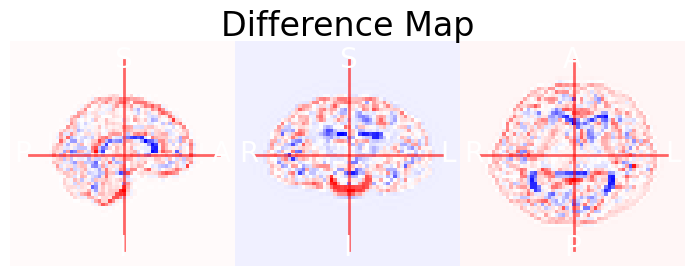

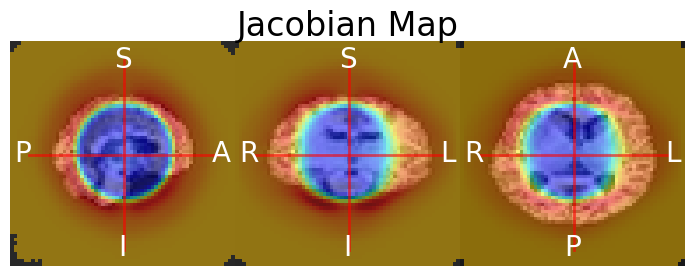

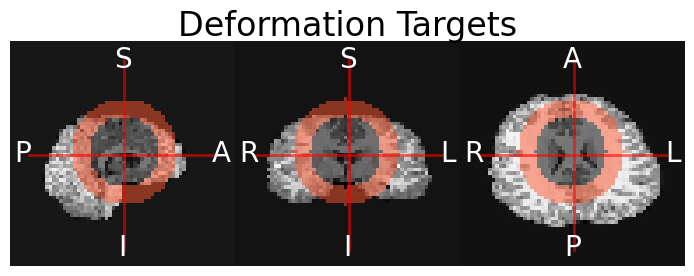

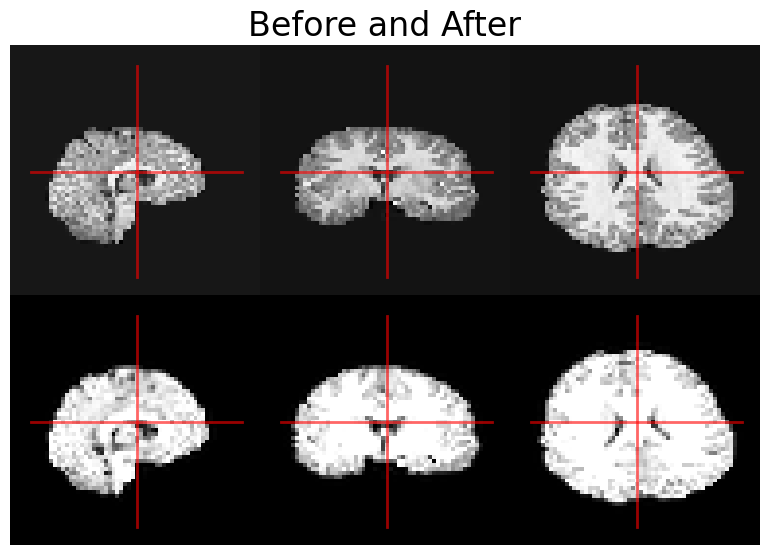

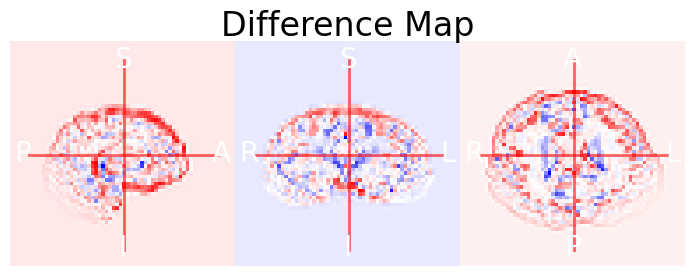

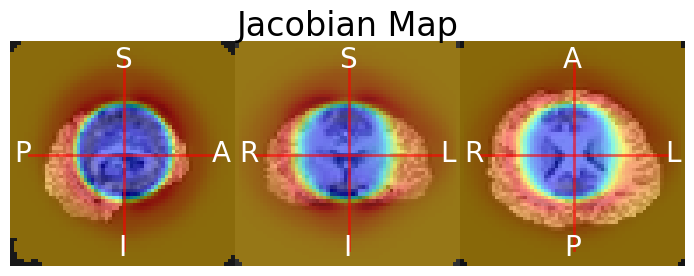

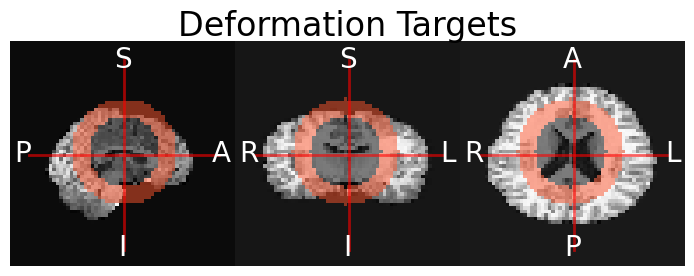

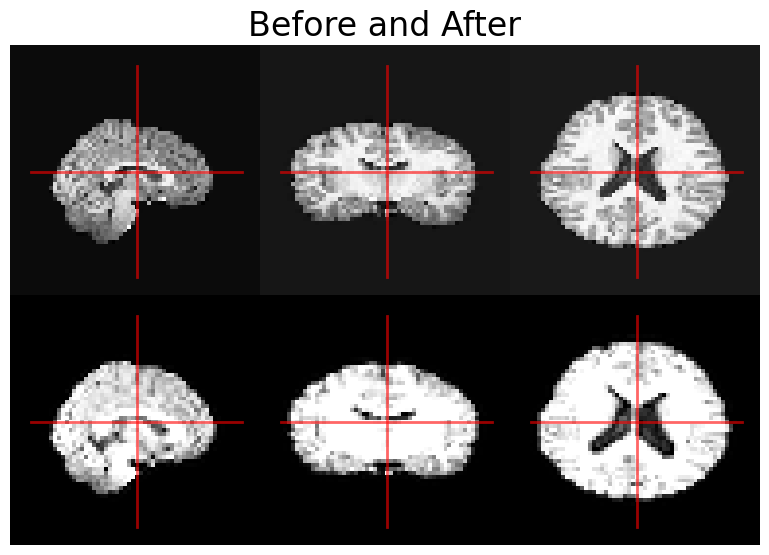

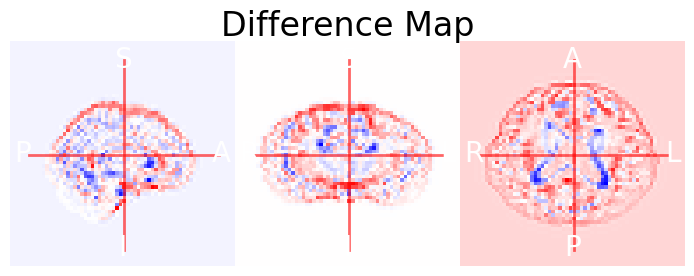

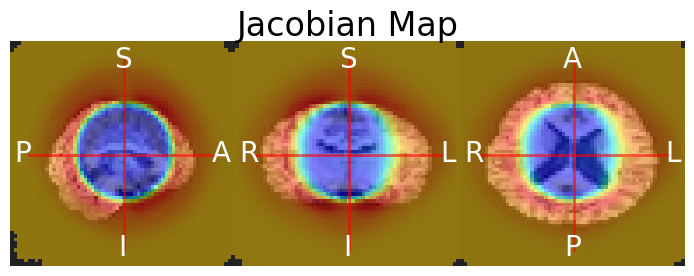

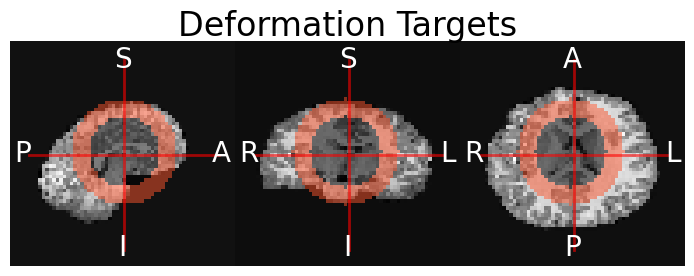

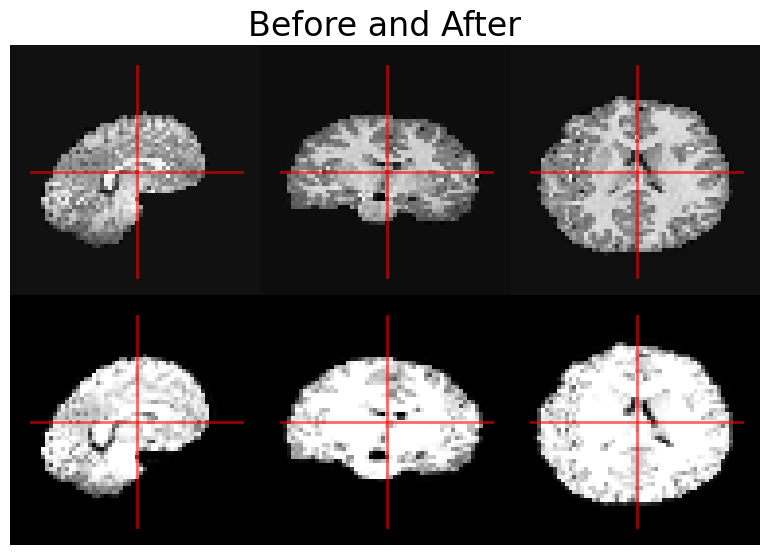

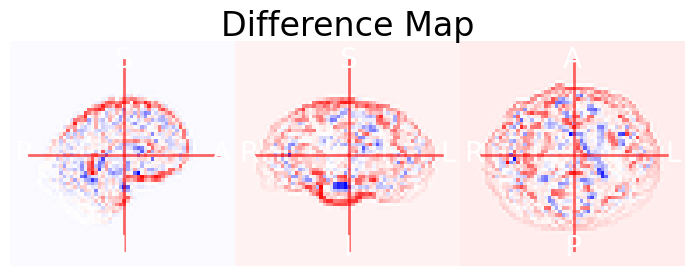

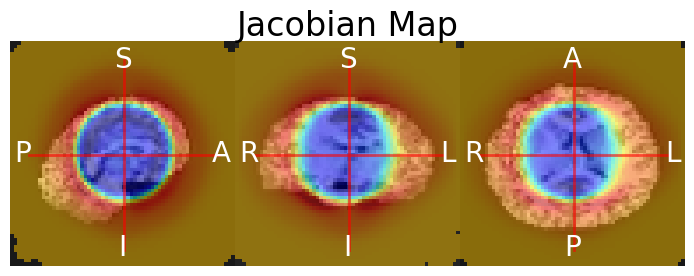

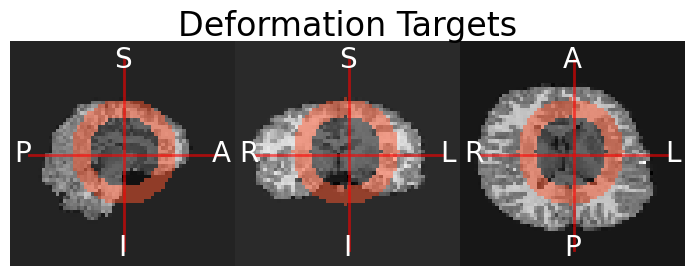

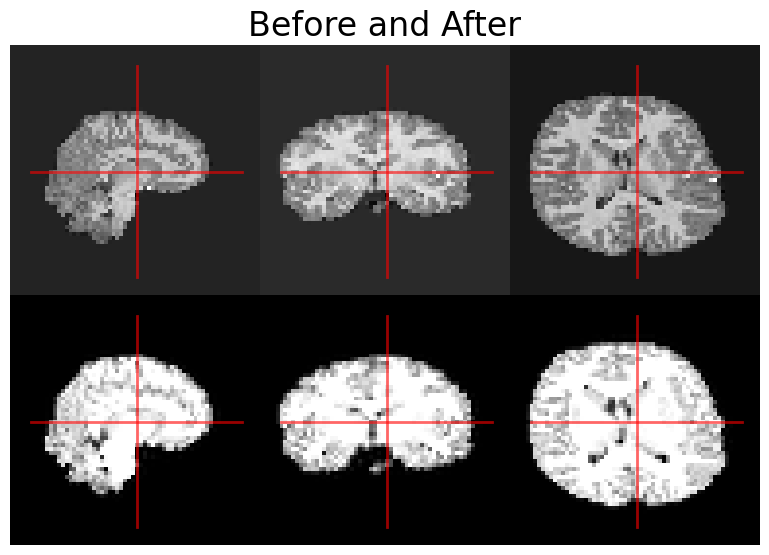

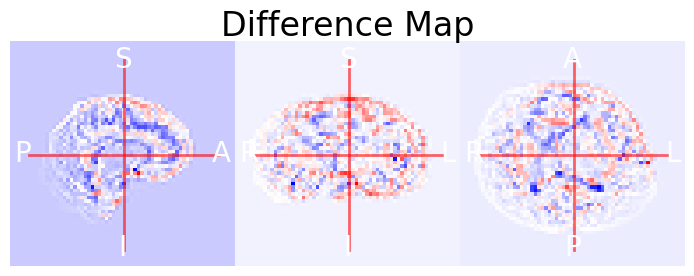

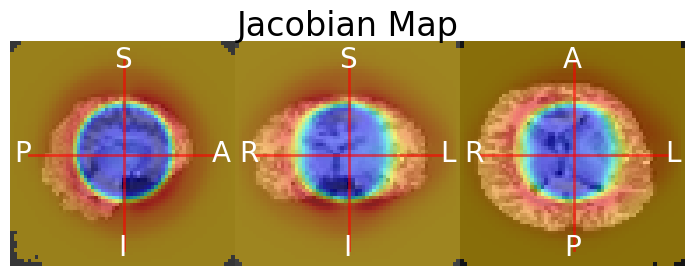

In [50]:
for s in lst:
    temp = ants.image_read(f'../BC-sim/Brains_ADHD200/{s}_Extracted_Brain-Copy1.nii.gz')
    temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
    temp = temp.iMath_normalize()
    do_selective_tx(temp,coords = (32,32,32),sz1=10,sz2=15)  # SIM 16p11.2 duplication
    ofn = f'../BC-sim/Warped_Brains/{s}_sim_16p11.2_duplication.nii.gz'
    warpedBrain.to_file(ofn) #save it

## Warp Brain Loop Global Compression

In [51]:
lst = ['sub-0010001',
 'sub-0010002',
 'sub-0010003',
 'sub-0010004',
 'sub-0010005',
 'sub-0010006',
 'sub-0010007',
 'sub-0010008',
 'sub-0010009',
 'sub-0010010']

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



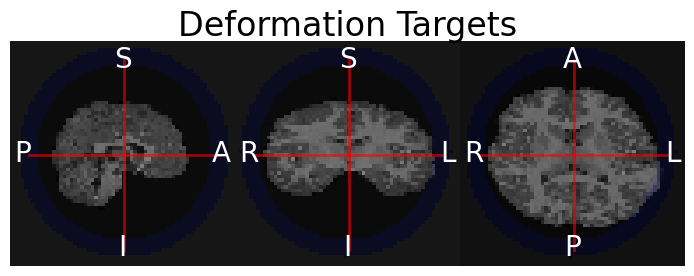

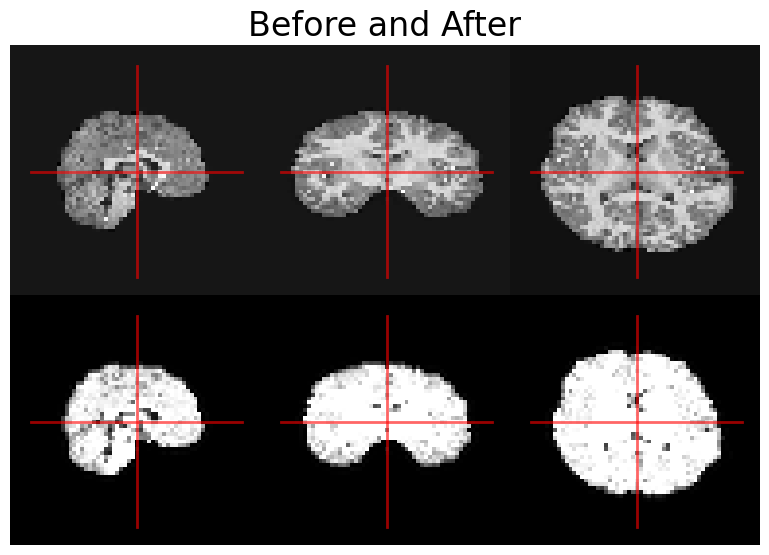

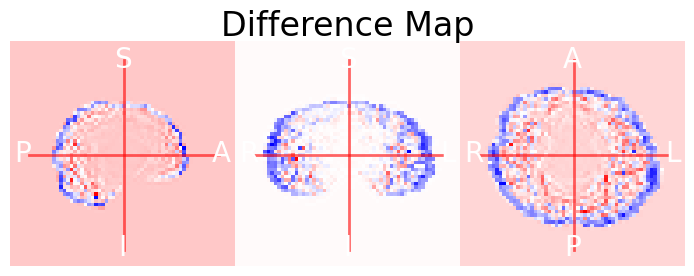

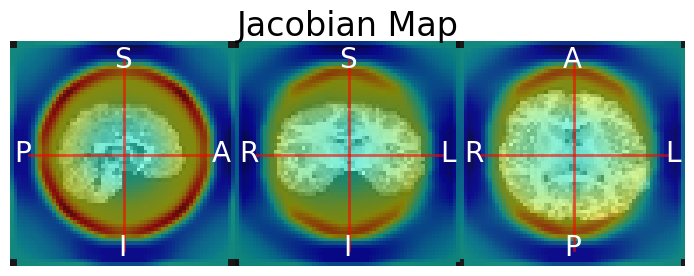

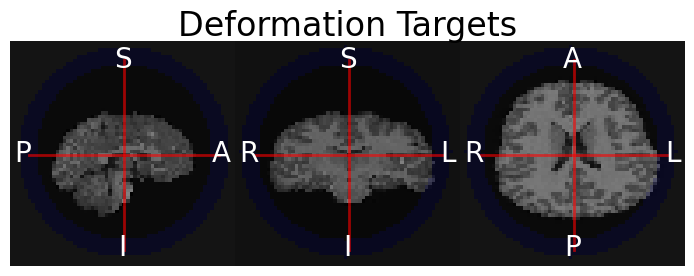

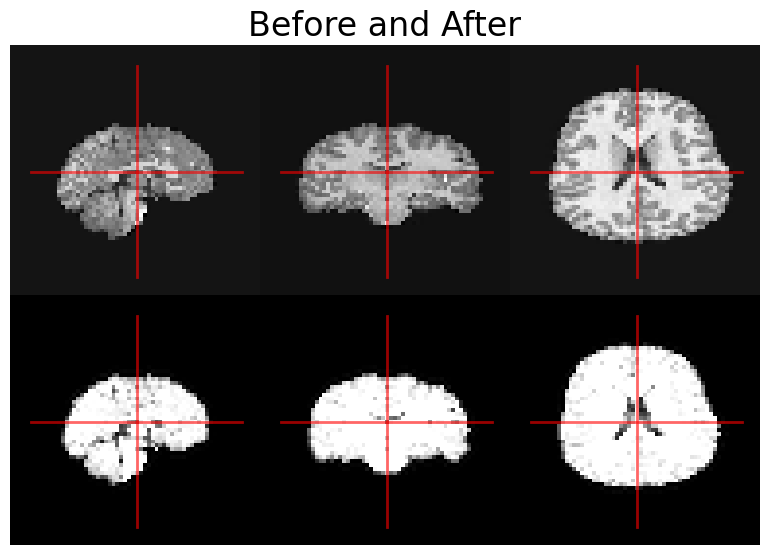

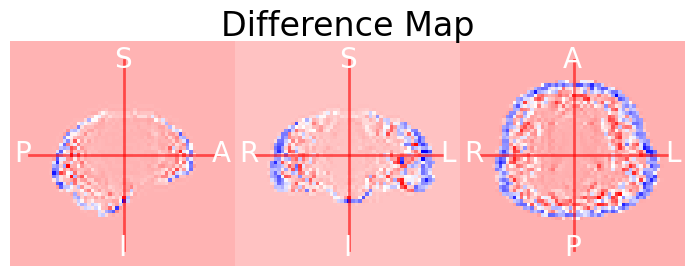

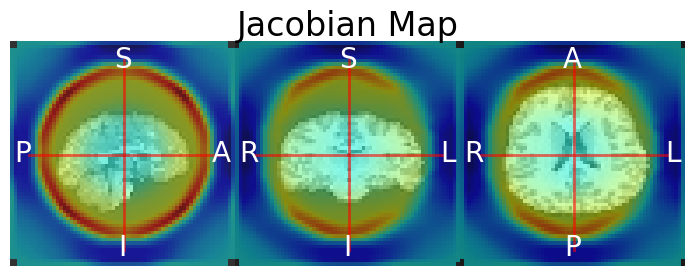

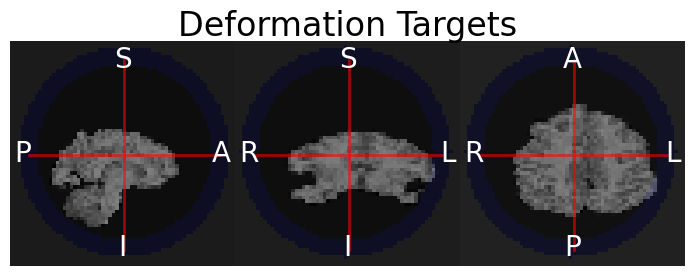

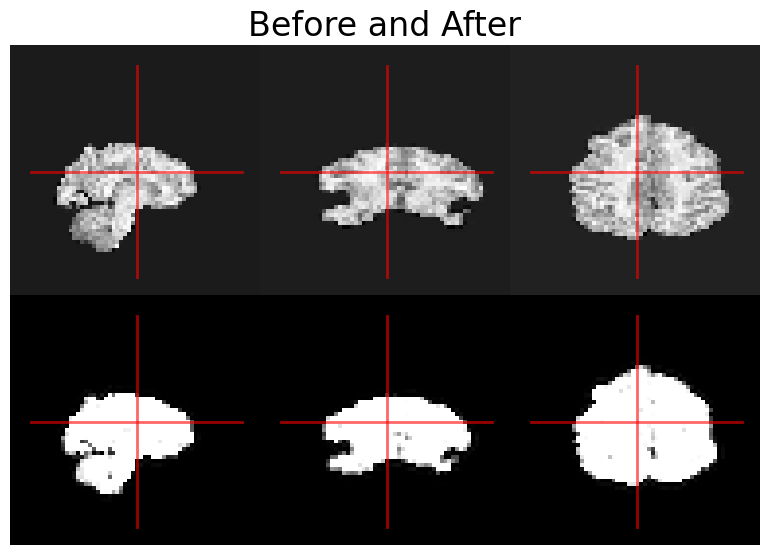

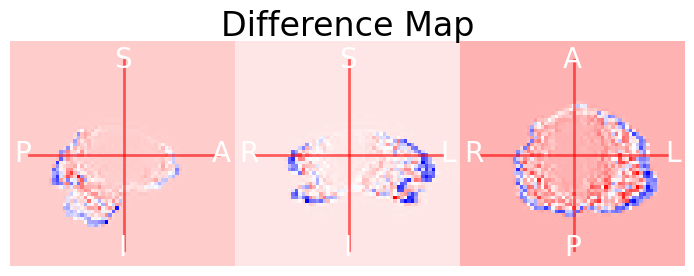

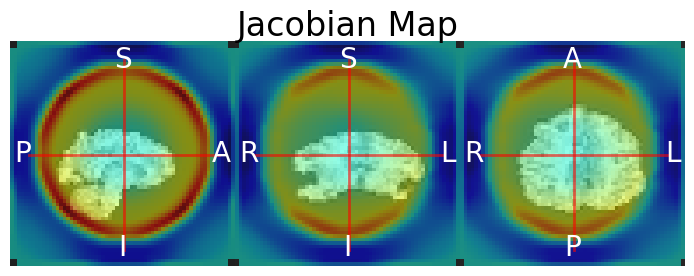

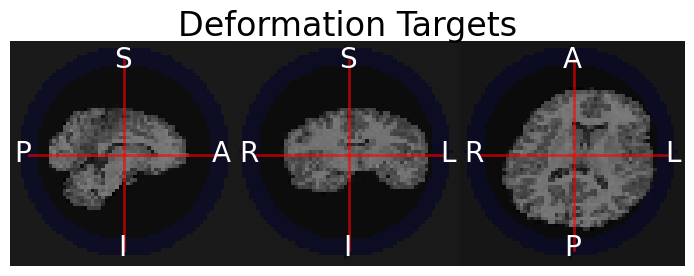

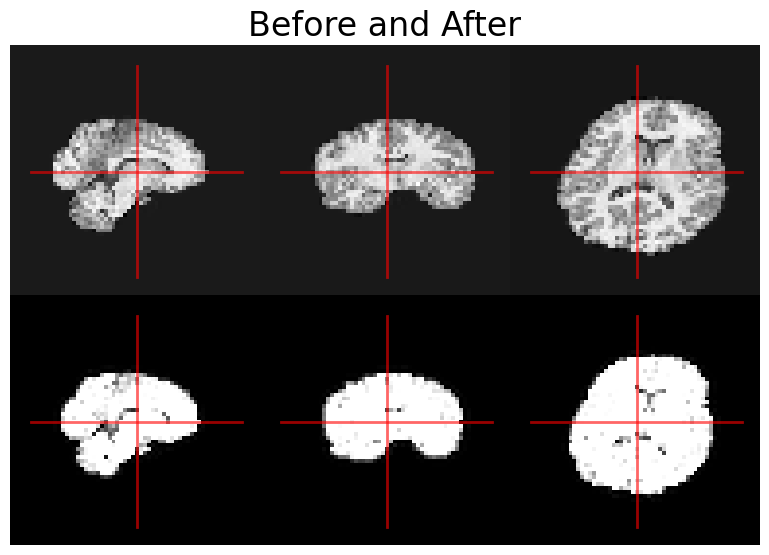

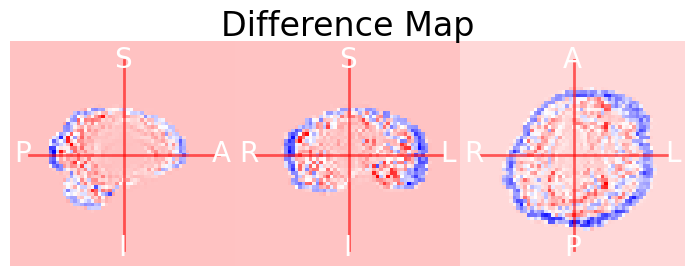

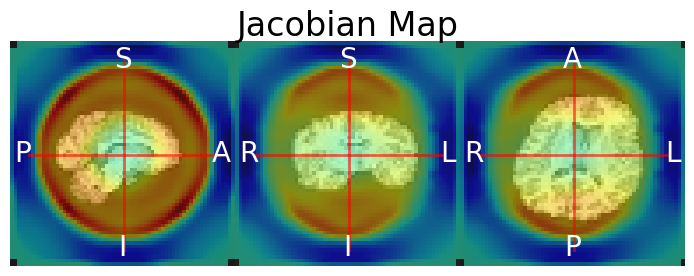

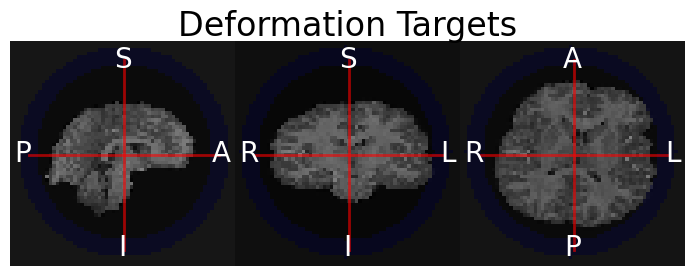

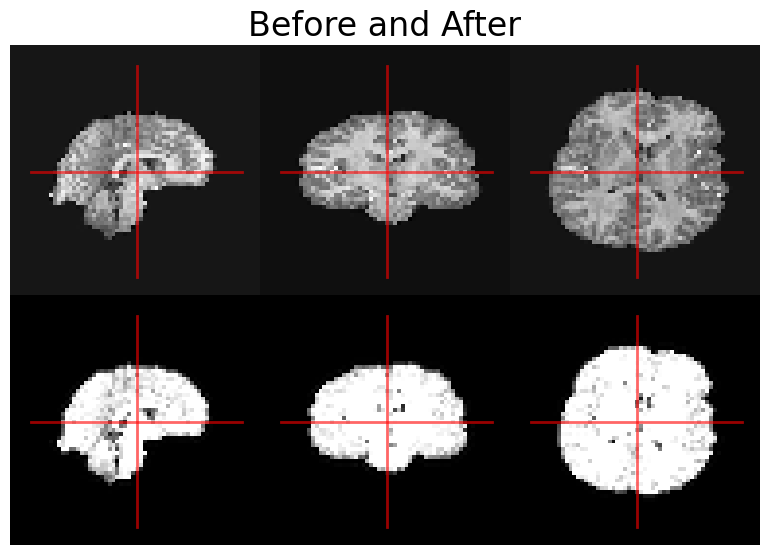

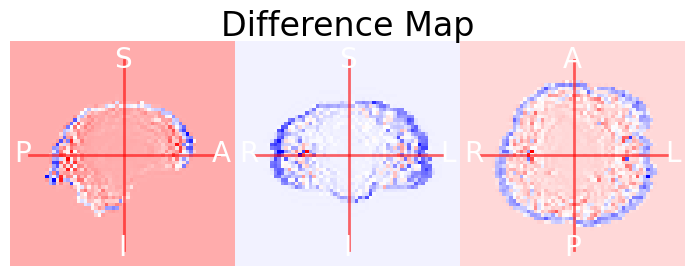

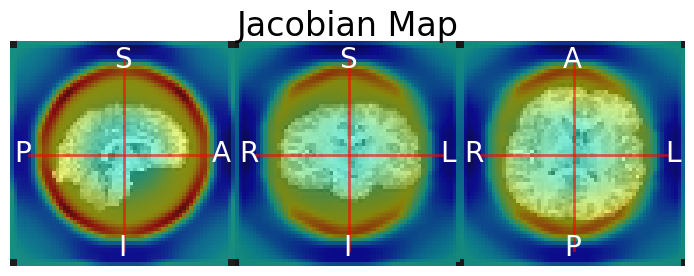

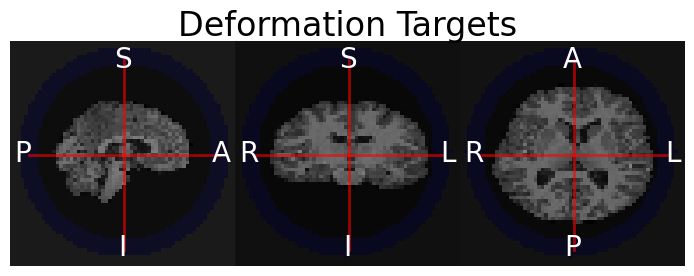

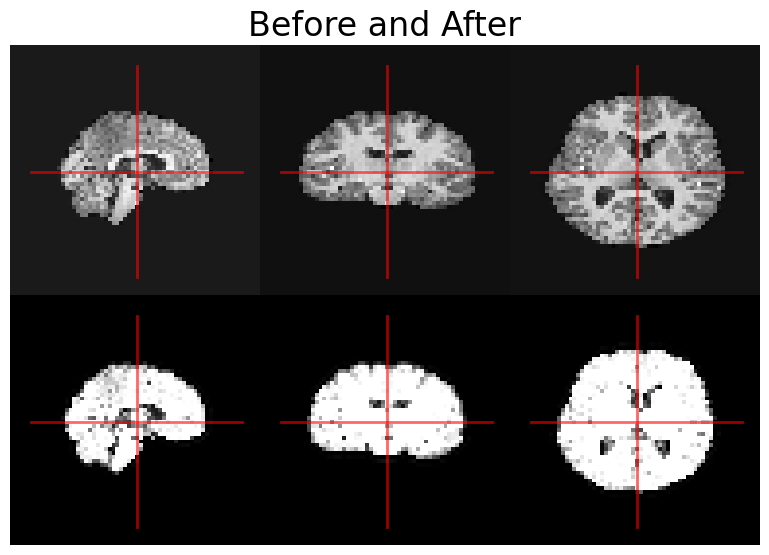

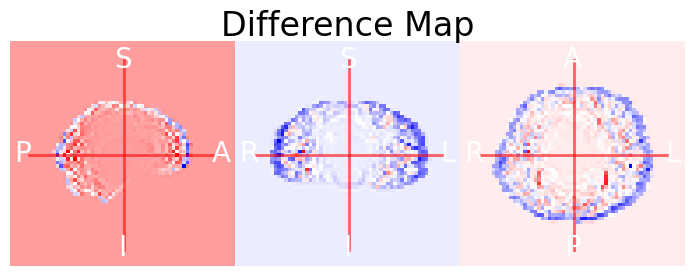

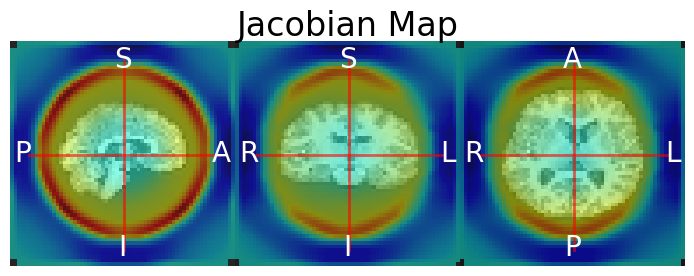

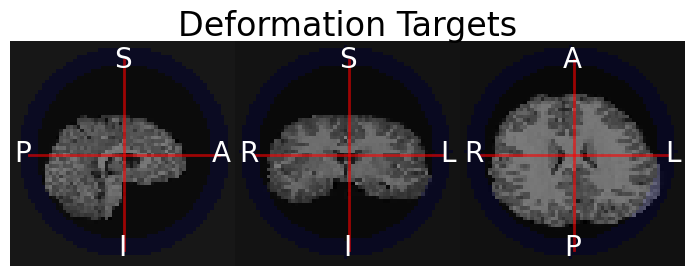

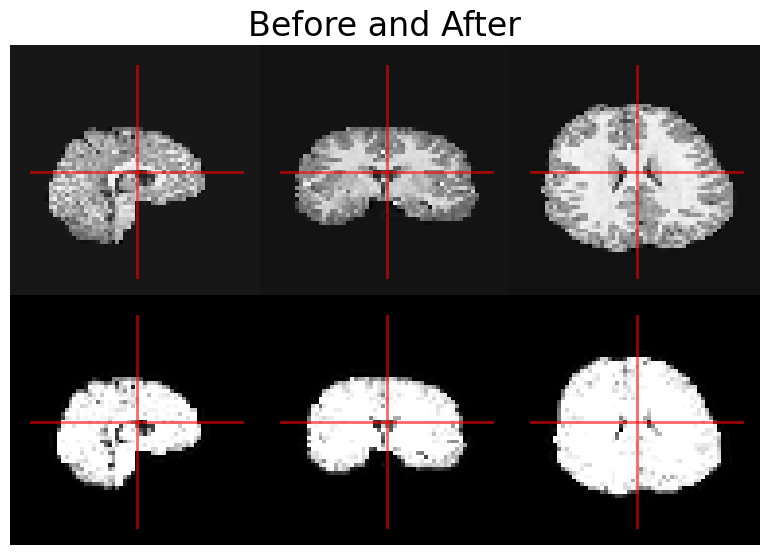

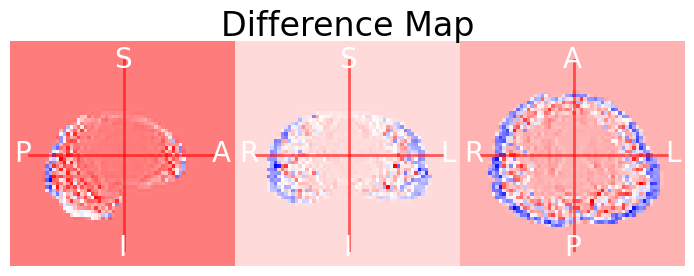

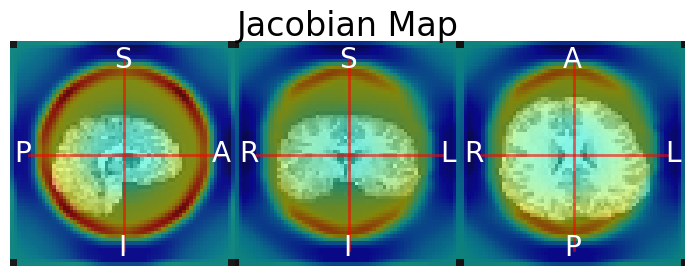

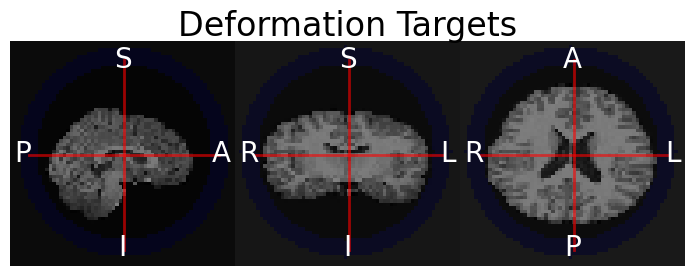

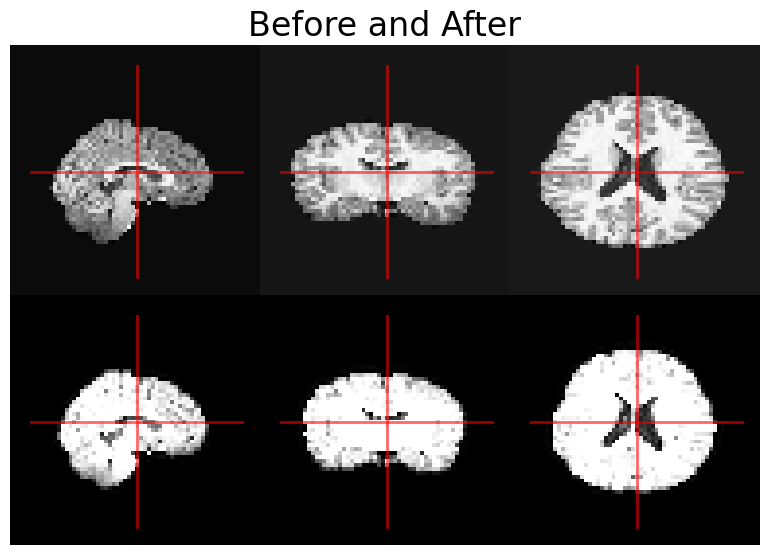

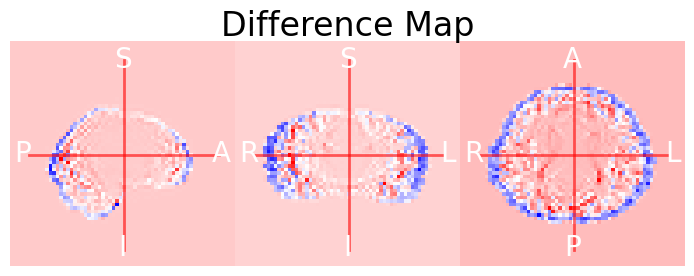

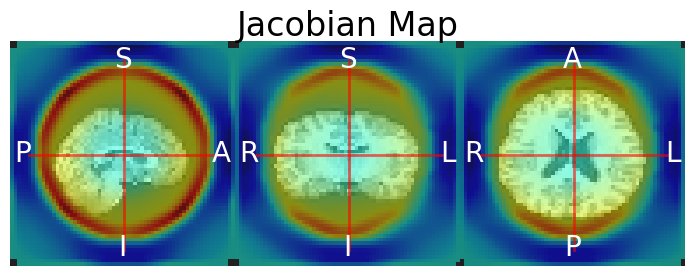

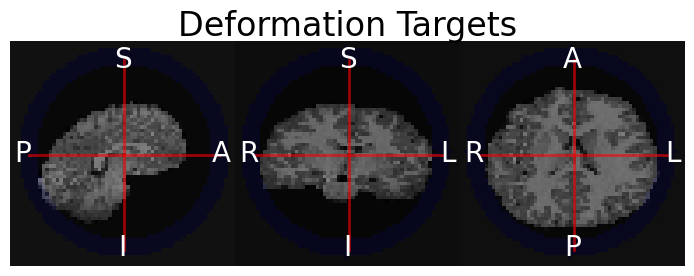

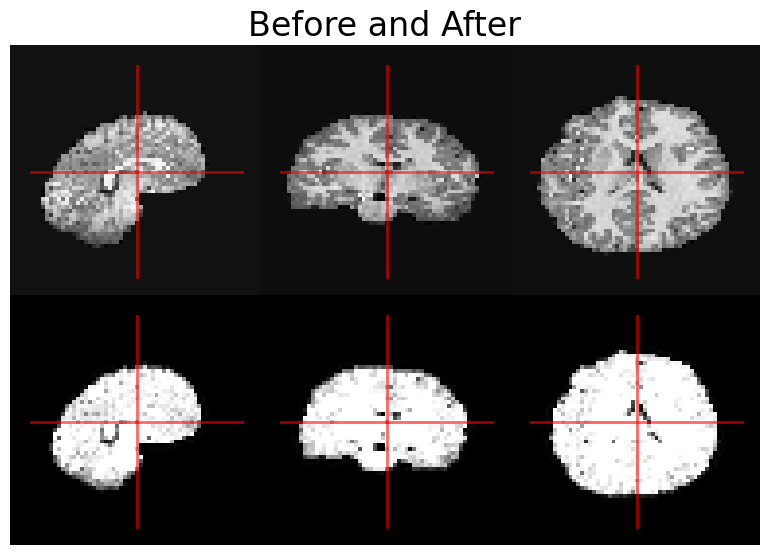

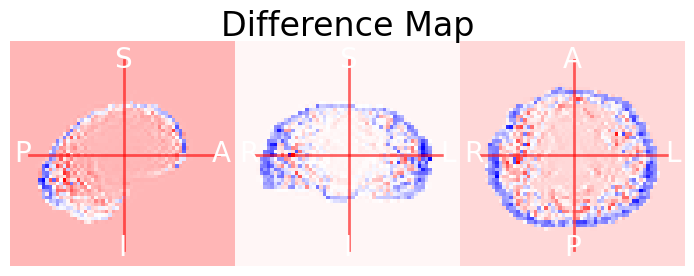

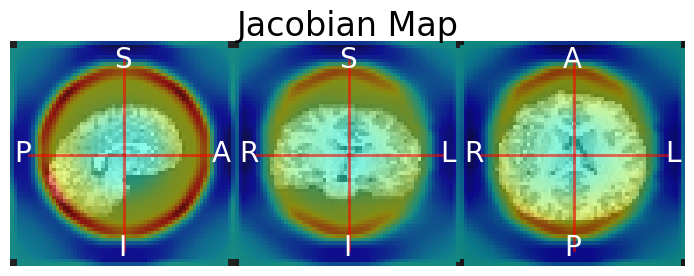

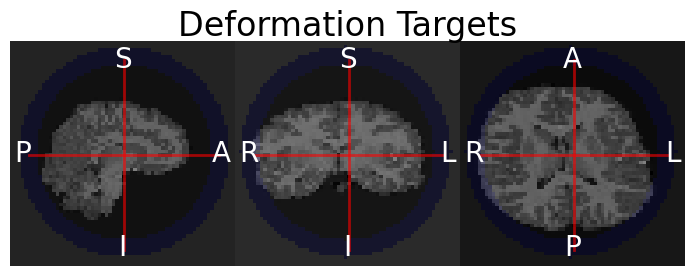

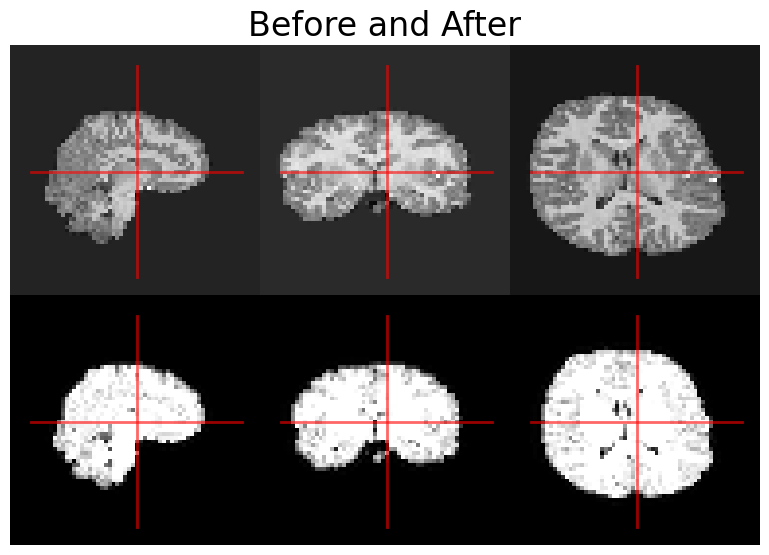

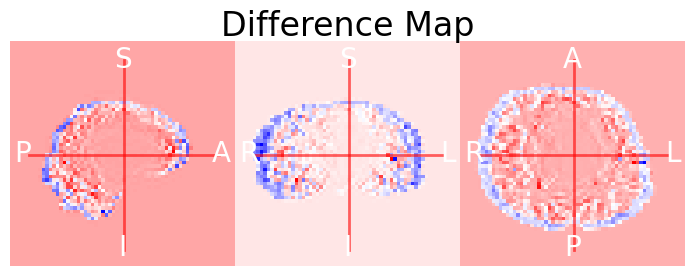

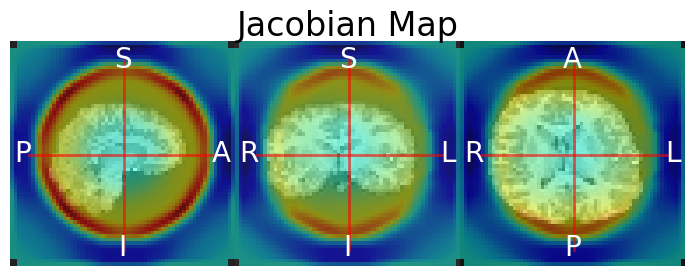

In [52]:
for s in lst:
    temp = ants.image_read(f'../BC-sim/Brains_ADHD200/{s}_Extracted_Brain-Copy1.nii.gz')
    temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
    temp = temp.iMath_normalize()
    do_selective_tx(temp,coords = (32,32,32),sz1=30,sz2=25) # Global compress realistic
    ofn = f'../BC-sim/Warped_Brains/{s}_sim_global_compress_realistic.nii.gz'
    warpedBrain.to_file(ofn) #save it